Data Read

In [6]:
#install.packages("openxlsx")

In [7]:
library(openxlsx)

In [1]:
data <- read.xlsx("data/kn1.xlsx",  sheet = 1)

ERROR: Error in read.xlsx("data/kn1.xlsx", sheet = 1): could not find function "read.xlsx"


In [12]:
head(data)

,N,Name,Group,Email
,<dbl>,<chr>,<dbl>,<chr>
1,1,Андрощук Роман Вікторович,1,roman.androshchuk@oa.edu.ua
2,2,Башмаков Богдан Олегович,1,bohdan.bashmakov@oa.edu.ua
3,3,Боженко Анастасія Ігорівна,1,anastasiia.bozhenko@oa.edu.ua
4,4,Власенко Андрій Максимович,1,andrii.vlasenko@oa.edu.ua
5,5,Войтюк Назарій Васильович,1,nazarii.voitiuk@oa.edu.ua
6,6,Воробей Юрій Вікторович,1,yurii.vorobei@oa.edu.ua


[1] "КН11" "КН11" "КН11" "КН11" "КН11" "КН11" "КН11" "КН11" "КН11" "КН11"
[11] "КН11" "КН12" "КН12" "КН12" "КН12" "КН12" "КН12" "КН12" "КН12" "КН12"
[21] "КН12" "КН12"

In [21]:
data$Group <- paste("КН1", data$Group, sep = "")

In [26]:
head(data)

,N,Name,Group,Email
,<dbl>,<chr>,<chr>,<chr>
1,1,Андрощук Роман Вікторович,КН11,roman.androshchuk@oa.edu.ua
2,2,Башмаков Богдан Олегович,КН11,bohdan.bashmakov@oa.edu.ua
3,3,Боженко Анастасія Ігорівна,КН11,anastasiia.bozhenko@oa.edu.ua
4,4,Власенко Андрій Максимович,КН11,andrii.vlasenko@oa.edu.ua
5,5,Войтюк Назарій Васильович,КН11,nazarii.voitiuk@oa.edu.ua
6,6,Воробей Юрій Вікторович,КН11,yurii.vorobei@oa.edu.ua


In [27]:
write.xlsx(data, "data/kn1_new.xlsx", colNames = TRUE)

## XML

In [28]:
xml_path <- "data/workers.xml"

In [31]:
#install.packages("XML")
#install.packages("methods")

In [32]:
library("XML")
library("methods")

In [35]:
result <- xmlParse(file = xml_path)
print(result)

<?xml version="1.0"?>
<RECORDS>
  <EMPLOYEE>
    <ID>1</ID>
    <NAME>Rick</NAME>
    <SALARY>623.3</SALARY>
    <STARTDATE>1/1/2012</STARTDATE>
    <DEPT>IT</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>2</ID>
    <NAME>Dan</NAME>
    <SALARY>515.2</SALARY>
    <STARTDATE>9/23/2013</STARTDATE>
    <DEPT>Operations</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>3</ID>
    <NAME>Michelle</NAME>
    <SALARY>611</SALARY>
    <STARTDATE>11/15/2014</STARTDATE>
    <DEPT>IT</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>4</ID>
    <NAME>Ryan</NAME>
    <SALARY>729</SALARY>
    <STARTDATE>5/11/2014</STARTDATE>
    <DEPT>HR</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>5</ID>
    <NAME>Gary</NAME>
    <SALARY>843.25</SALARY>
    <STARTDATE>3/27/2015</STARTDATE>
    <DEPT>Finance</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>6</ID>
    <NAME>Nina</NAME>
    <SALARY>578</SALARY>
    <STARTDATE>5/21/2013</STARTDATE>
    <DEPT>IT</DEPT>
  </EMPLOYEE>
  <EMPLOYEE>
    <ID>7</ID>
    <NAME>Simon</NAME>
    <SALARY>632.8<

In [38]:
rootnode <- xmlRoot(result) # reading rootnode of xml document
rootnode[[2]]

<EMPLOYEE>
  <ID>2</ID>
  <NAME>Dan</NAME>
  <SALARY>515.2</SALARY>
  <STARTDATE>9/23/2013</STARTDATE>
  <DEPT>Operations</DEPT>
</EMPLOYEE> 

In [42]:
data <- xmlToDataFrame(xml_path)
data

ID,NAME,SALARY,STARTDATE,DEPT
<chr>,<chr>,<chr>,<chr>,<chr>
1,Rick,623.3,1/1/2012,IT
2,Dan,515.2,9/23/2013,Operations
3,Michelle,611,11/15/2014,IT
4,Ryan,729,5/11/2014,HR
5,Gary,843.25,3/27/2015,Finance
6,Nina,578,5/21/2013,IT
7,Simon,632.8,7/30/2013,Operations
8,Guru,722.5,6/17/2014,Finance


In [44]:
data$SALARY <- as.numeric(data$SALARY)

In [45]:
head(data)

,ID,NAME,SALARY,STARTDATE,DEPT
,<chr>,<chr>,<dbl>,<chr>,<chr>
1,1,Rick,623.30,1/1/2012,IT
2,2,Dan,515.20,9/23/2013,Operations
3,3,Michelle,611.00,11/15/2014,IT
4,4,Ryan,729.00,5/11/2014,HR
5,5,Gary,843.25,3/27/2015,Finance
6,6,Nina,578.00,5/21/2013,IT


## API demo

In [48]:
# install.packages("jsonlite")

In [49]:
library(jsonlite)

In [50]:
# https://api.binance.com/api/v3/klines?symbol=

In [52]:
market = 'BTCUSDT'
interval = '1h'
limit = 100

url <- paste0(url = "https://api.binance.com/api/v3/klines?symbol=", market ,"&interval=", interval,"&limit=", limit)
print(url) 

[1] "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1h&limit=100"


In [53]:
data <- fromJSON(url)

In [55]:
head(data)

1711173600000,64075.13000000,64289.98000000,63984.00000000,64166.00000000,672.35298000,1711177199999,43113708.68458750,56229,309.68436000,19861860.52178710,0
1711177200000,64166.01000000,64856.01000000,64162.02000000,64575.41000000,1460.39196000,1711180799999,94311129.87050390,80378,781.38791000,50463847.18794910,0
1711180800000,64575.41000000,64857.14000000,64220.00000000,64521.99000000,1135.10972000,1711184399999,73243153.58298440,69721,518.17415000,33444854.17441850,0
1711184400000,64522.00000000,64597.64000000,64186.21000000,64470.00000000,802.07123000,1711187999999,51611101.36205060,62709,364.71520000,23469890.50670210,0
1.711188e+12,64470.00000000,64712.33000000,64204.09000000,64320.01000000,884.49724000,1711191599999,57036577.46246520,72727,374.39768000,24150030.56328060,0
1711191600000,64320.00000000,64629.62000000,64234.00000000,64629.62000000,639.87361000,1711195199999,41260831.35308810,57022,350.87398000,22627680.88648620,0


In [57]:
data <- data[, 1:7]
head(data)

1711173600000,64075.13000000,64289.98000000,63984.00000000,64166.00000000,672.35298000,1711177199999
1711177200000,64166.01000000,64856.01000000,64162.02000000,64575.41000000,1460.39196000,1711180799999
1711180800000,64575.41000000,64857.14000000,64220.00000000,64521.99000000,1135.10972000,1711184399999
1711184400000,64522.00000000,64597.64000000,64186.21000000,64470.00000000,802.07123000,1711187999999
1.711188e+12,64470.00000000,64712.33000000,64204.09000000,64320.01000000,884.49724000,1711191599999
1711191600000,64320.00000000,64629.62000000,64234.00000000,64629.62000000,639.87361000,1711195199999


In [59]:
data <- as.data.frame(data) 
head(data)

,V1,V2,V3,V4,V5,V6,V7
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1711173600000,64075.13000000,64289.98000000,63984.00000000,64166.00000000,672.35298000,1711177199999
2,1711177200000,64166.01000000,64856.01000000,64162.02000000,64575.41000000,1460.39196000,1711180799999
3,1711180800000,64575.41000000,64857.14000000,64220.00000000,64521.99000000,1135.10972000,1711184399999
4,1711184400000,64522.00000000,64597.64000000,64186.21000000,64470.00000000,802.07123000,1711187999999
5,1.711188e+12,64470.00000000,64712.33000000,64204.09000000,64320.01000000,884.49724000,1711191599999
6,1711191600000,64320.00000000,64629.62000000,64234.00000000,64629.62000000,639.87361000,1711195199999


In [60]:
colnames(data) <- c("Open_time", "Open", "High", "Low", "Close", "Volume", "Close_time")
head(data)

,Open_time,Open,High,Low,Close,Volume,Close_time
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1711173600000,64075.13000000,64289.98000000,63984.00000000,64166.00000000,672.35298000,1711177199999
2,1711177200000,64166.01000000,64856.01000000,64162.02000000,64575.41000000,1460.39196000,1711180799999
3,1711180800000,64575.41000000,64857.14000000,64220.00000000,64521.99000000,1135.10972000,1711184399999
4,1711184400000,64522.00000000,64597.64000000,64186.21000000,64470.00000000,802.07123000,1711187999999
5,1.711188e+12,64470.00000000,64712.33000000,64204.09000000,64320.01000000,884.49724000,1711191599999
6,1711191600000,64320.00000000,64629.62000000,64234.00000000,64629.62000000,639.87361000,1711195199999


In [63]:
data <-  data.frame(sapply(data, as.numeric))

In [65]:
head(data)

,Open_time,Open,High,Low,Close,Volume,Close_time
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.711174e+12,64075.13,64289.98,63984.00,64166.00,672.3530,1.711177e+12
2,1.711177e+12,64166.01,64856.01,64162.02,64575.41,1460.3920,1.711181e+12
3,1.711181e+12,64575.41,64857.14,64220.00,64521.99,1135.1097,1.711184e+12
4,1.711184e+12,64522.00,64597.64,64186.21,64470.00,802.0712,1.711188e+12
5,1.711188e+12,64470.00,64712.33,64204.09,64320.01,884.4972,1.711192e+12
6,1.711192e+12,64320.00,64629.62,64234.00,64629.62,639.8736,1.711195e+12


In [68]:
data$Open_time <- as.POSIXct(data$Open_time/1e3, origin = '1970-01-01')
data$Close_time <- as.POSIXct(data$Close_time/1e3, origin = '1970-01-01')

ERROR: Error in Ops.POSIXt(data$Open_time, 1000): '/' not defined for "POSIXt" objects


In [73]:

tail(data)


,Open_time,Open,High,Low,Close,Volume,Close_time
,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
95,2024-03-27 06:00:00,70388.00,70487.37,70034.45,70190.00,1011.9958,2024-03-27 06:59:59
96,2024-03-27 07:00:00,70190.00,70519.99,70154.37,70475.07,830.0696,2024-03-27 07:59:59
97,2024-03-27 08:00:00,70475.06,70598.00,70164.46,70309.99,785.6260,2024-03-27 08:59:59
98,2024-03-27 09:00:00,70310.00,70331.62,69640.00,69725.99,1565.7144,2024-03-27 09:59:59
99,2024-03-27 10:00:00,69726.00,69991.71,69510.00,69547.91,1124.4161,2024-03-27 10:59:59
100,2024-03-27 11:00:00,69547.91,69759.43,69407.00,69734.00,610.5105,2024-03-27 11:59:59


In [78]:
length((data$Open + data$Close)/2)

[1] 100

In [79]:
length(data$Open_Time)

[1] 0

In [80]:
data_final <- data.frame(Date = data$Open_time,
                        MeanPrice = (data$Open + data$Close) / 2)

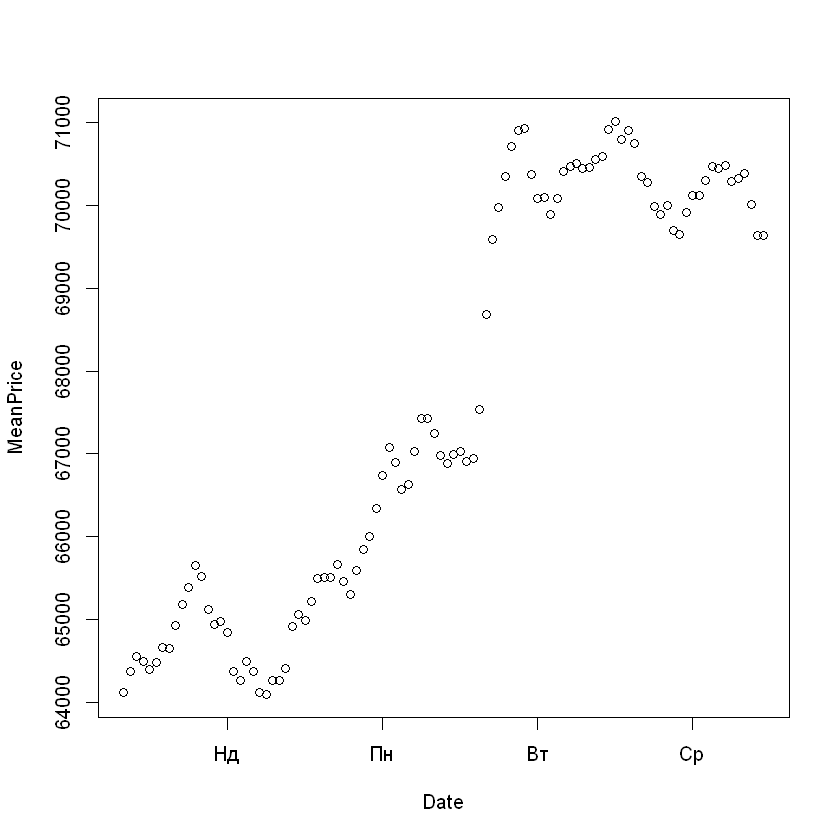

In [82]:
plot(data_final)

## Data from web

In [84]:
# install.packages("rvest")

In [86]:
library(rvest)

In [88]:
url <- "https://en.wikipedia.org/wiki/List_of_largest_banks"

In [90]:
page <- read_html(url)
page

{html_document}
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-night-mode-disabled skin-night-mode-clientpref-0 vector-toc-available" lang="en" dir="ltr">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body class="skin-vector skin-vector-search-vue mediawiki ltr sitedir-ltr ...

In [92]:
tables <- html_nodes(page, "table")
tables

{xml_nodeset (3)}
[1] <table class="wikitable sortable mw-collapsible"><tbody>\n<tr>\n<th data- ...
[2] <table class="wikitable sortable mw-collapsible"><tbody>\n<tr>\n<th data- ...
[3] <table class="wikitable sortable mw-collapsible">\n<caption>Number of ban ...

In [98]:
data <- data.frame(html_table(tables[1]))

In [99]:
head(data)

,Rank,Bank.name,Market.cap.US..billion.
,<int>,<chr>,<dbl>
1,1,JPMorgan Chase,491.76
2,2,Bank of America,266.45
3,3,Industrial and Commercial Bank of China,219.45
4,4,Wells Fargo,178.74
5,5,Agricultural Bank of China,175.69
6,6,HDFC Bank,169.84


In [101]:
colnames(data) <- c("Rank", "Name", "MarketCap")

In [103]:
head(data)

,Rank,Name,MarketCap
,<int>,<chr>,<dbl>
1,1,JPMorgan Chase,491.76
2,2,Bank of America,266.45
3,3,Industrial and Commercial Bank of China,219.45
4,4,Wells Fargo,178.74
5,5,Agricultural Bank of China,175.69
6,6,HDFC Bank,169.84


In [104]:
range(data$MarketCap)

[1] 150.39 491.76